# Basic principles of pricing and hedging

We shall first go through basic principles of modeling in mathematical Finance before we introduce concepts of interest rate theory.

We shall denote by $ S^i $ the price of asset $i$ and by $ H^i $ the holdings in asset $i$ (can be any real number here, no market frictions assumed). $ H^i_t $ is determined at time $ t- 1 $ with all the information available there.

First we learn to write portfolio values, i.e. $ V_t = \sum_{i=0}^d H^i_tS^i_t $ as P & L processes in case the portfolio is self-financing. Self-financing means that
$$
\sum_{i=0}^d H^i_{t+1}S^i_t = \sum_{i=0}^d H^i_tS^i_t \, ,
$$
which in turn leads to
$$
V_{t+1} - V_t = \sum_{i=0}^d H^i_{t+1} (S^i_{t+1} - S^i_{t}) \, .
$$
This means that the change in value of the portfolio comes from the change in value of the prices and nothing else.

This formula allows for a simplification. If we divide everything by the value of $S^0$, the price of the $0$-th asset, then in the above sum one term vanishes. We denote $ X^i_t = S^i_t/S^0_t $
When discounted, e.g. by $S^0$, this means
$$
\frac{V_t}{S^0_t} - \frac{V_0}{S^0_0} = (H \bullet X)_t = \sum_{s \leq t} \sum_{i=1}^d H^i_{t+1} (X^i_{s+1} - X^i_{s})\, .
$$
Notice that the inner sum only starts at $1$ because $ X^0_t = 1 $.

The right hand side is a P & L process. The argument can be turned around: given a portfolio value which is given by a constant plus a P & L process, then we can of course construct a self-financing portfolio.

Consider now a one period case: we can ask whether arbitrages are possible and under which conditions (for which price) payoffs can be dominated (super-hedged) by self-financing portfolios.

### A model is free of arbitrage if there is no self-financing portfolio which starts at zero and has a positive outcome

### We assume from now on that any positive outcome of a self-financing portfolio cannot come for free, i.e. the initial capital $x$ has to be positive, too.

This leads us the valuation problem: what is the value of a payoff $f$ at time $T$? We can answer that by constructing appropriate (super-)hedging portfolios. Superhedging just means hear "dominating".

Let us consider this question in a one period case, i.e. $T=1$. The states of the world are denoted by $\omega$, hence we are interested in the question to find the smallest $ x $ such that for all $ \omega $
$$
f(\omega) \leq x + \sum_{i=1}^d H_0^i (X^i_1(\omega)-X^i_0(\omega)) \, .
$$
This is equivalent to characterize the cone $ C:= \{ (H \bullet X)_1 - g \text{ for all possible strategies } H \text{ and } g \geq 0\} $.

This is a geometric question: the solution is $ C = \{ e \text{ such that } E_Q[e] \leq 0 \text{ for all equivalent martingale measures } $Q$\} $. This yields the beautiful formula
$$
\sup_{Q \in \mathcal{M}} E_Q[f] = \inf \{x \text{ such that there is a strategy } H \text{ with } f \leq x + (H \bullet X)_1 \} \, .
$$
The set $\mathcal{M} $ is the set of equivalent martingale measures. A super-hedging portfolio is a self-financing portfolio (i.e. the value process is the initial value of the portfolio plus the P&L process -- all in discounted terms) dominating a certain payoff.

We have seen in one step bi- and tri-nomial models that pricing and hedging are in a fundamental duality relationship given a certain payoff: the largest arbitrage free price equals the smallest price of a super-hedging portfolio. Superhedging prices can be calculated by backwards induction.

### This yields the following pricing formula: if a payoff's contract is liquidly traded at price $ \pi_t(f) $ at intermediate times $ t $, then there exists an equivalent martingale measure for the given market constituted by $X^1,\dots,X^d$ such that
$$
E_Q\big[ \frac{f}{S^0_T} | \mathcal{F}_t \big] = \frac{\pi_t(f)}{S^0_t} .
$$
Let us consider these principles in the following modeling situations. Furthermore models are free of arbitrage if and only if there exists an equivalent pricing measure, which associates in particular to P & L processes the value $0$. Whence prices of payoffs can be calculated by taking expectations (i.e. a Monte Carlo evaluation is possible) with respect to this equivalent pricing measure.


First we draw the tree in undiscounted terms in the format time / numeraire / stock price. For simplicity we take the numeraire equal to $1$ but one can easily adapt that. Next the draw the tree in discounted terms in the format time / price. 

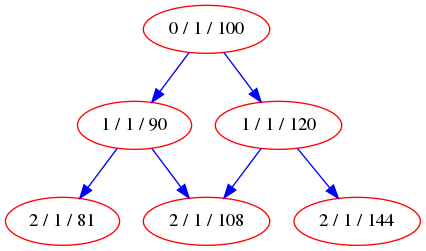

In [117]:
import numpy as np
from itertools import product


# EUROPEAN
S0 = 100.
u  = 1.2
d  = 0.9
payoffE = lambda S: np.maximum(S-S0,0.)

timesteps = 2
bin = set((0,1))
trajectories = set(product(bin, repeat = timesteps))


import pygraphviz as PG
from IPython.display import Image
binomialtreeforward = PG.AGraph(directed=True, strict=True)
binomialtreeforward.edge_attr.update(len='2.0',color='blue')
binomialtreeforward.node_attr.update(color='red')
binomialtreeforwarddiscounted = PG.AGraph(directed=True, strict=True)
binomialtreeforwarddiscounted.edge_attr.update(len='2.0',color='blue')
binomialtreeforwarddiscounted.node_attr.update(color='red')
binomialtreebackward = PG.AGraph(directed=True, strict=True)
binomialtreebackward.edge_attr.update(len='2.0',color='blue')
binomialtreebackward.node_attr.update(color='red')
process = {(omega,0):S0 for omega in trajectories}
numeraire = {(omega,0):1. for omega in trajectories}
discountedprocess = {(omega,0):S0 for omega in trajectories}

#construct process by forward steps
for time in range(1,timesteps+1):
    for omega in trajectories:
        shelper = process[(omega,time-1)]*u**(omega[time-1])*d**(1.-omega[time-1])
        process.update({(omega,time):shelper})
        
for time in range(1,timesteps+1):
    for omega in trajectories:
        #shelper = process[(omega,time-1)]*u**(omega[time-1])*d**(1.-omega[time-1])
        numeraire.update({(omega,time):1.0})
        
for time in range(1,timesteps+1):
    for omega in trajectories:
        binomialtreeforward.add_edge('%d / %d / %d'% (time-1,numeraire[(omega,time-1)],process[(omega,time-1)]),
                                     '%d / %d / %d'% (time,numeraire[(omega,time)],process[(omega,time)]))

#for time in range(1,timesteps+1):
#    for omega in trajectories:
#        binomialtreeforward.add_edge('%d, %d'% (time-1,numeraire[(omega,time-1)]),'%d, %d'% (time,numeraire[(omega,time)]))

Image(binomialtreeforward.draw(format='png',prog='dot')) 

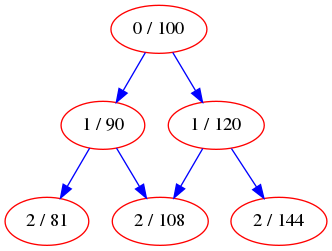

In [118]:
for time in range(0,timesteps+1):
    for omega in trajectories:
        shelper = process[(omega,time)]/numeraire[(omega,time)]
        discountedprocess.update({(omega,time):shelper})
        
for time in range(1,timesteps+1):
    for omega in trajectories:
        binomialtreeforwarddiscounted.add_edge('%d / %d'% (time-1,discountedprocess[(omega,time-1)]),'%d / %d'% (time,discountedprocess[(omega,time)]))

#for time in range(1,timesteps+1):
#    for omega in trajectories:
#        binomialtreeforward.add_edge('%d, %d'% (time-1,numeraire[(omega,time-1)]),'%d, %d'% (time,numeraire[(omega,time)]))


Image(binomialtreeforwarddiscounted.draw(format='png',prog='dot')) 

In [101]:
def condprob(omega,time): 
    omegahelperu = list(omega)
    omegahelperd = list(omega)
    omegahelperu[time]=1
    omegahelperd[time]=0
    omegahelperu = tuple(omegahelperu)
    omegahelperd = tuple(omegahelperd)
    return (discountedprocess[(omega,time)]-discountedprocess[(omegahelperd,time+1)])/(discountedprocess[(omegahelperu,time+1)]-discountedprocess[(omegahelperd,time+1)])

The previous function calculates the conditional probabilities which make the process at each node a martingale. Finally the price of a Eurpean Call payoff is calculated in a backwards manner. The tree is drawn in the format time / stock price / derivative price.

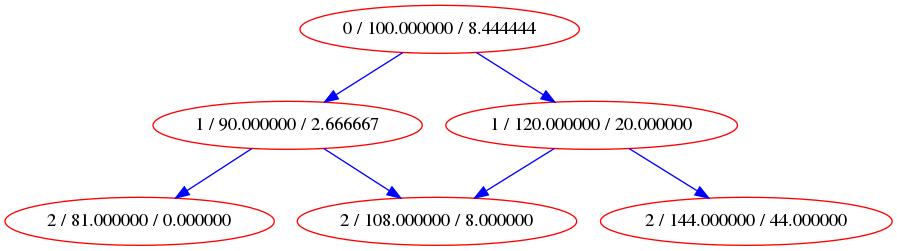

In [102]:
processbackward = {(omega,timesteps):(payoffE(process[(omega,timesteps)])/numeraire[(omega,timesteps)]) for omega in trajectories}
#backwardssteps: European
for time in reversed(range(0,timesteps)):
    for omega in trajectories:
        shelper=0                                   
        omegahelperu = list(omega)
        omegahelperd = list(omega)
        omegahelperu[time]=1
        omegahelperd[time]=0
        omegahelperu = tuple(omegahelperu)
        omegahelperd = tuple(omegahelperd)
        shelper = processbackward[(omegahelperu,time+1)]*condprob(omega,time)+processbackward[(omegahelperd,time+1)]*(1-condprob(omega,time))
        processbackward.update({(omega,time):shelper})

for time in range(1,timesteps+1):
    for omega in trajectories:
        binomialtreebackward.add_edge('%d / %f / %f'% (time-1,discountedprocess[(omega,time-1)],processbackward[(omega,time-1)]),'%d / %f / %f'% (time,discountedprocess[(omega,time)],processbackward[(omega,time)]))

Image(binomialtreebackward.draw(format='png',prog='dot'))       

Next we shall see the concepts of pricing and hedging realized in a geometric Brownian motion market environment. We shall use code from https://github.com/yhilpisch/dx for this purpose.

In [1]:
import dx
import datetime as dt
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np

First we shall define some market environment:

In [2]:
r = dx.constant_short_rate('r', 0.)
  # a constant short rate

cas_1 = dx.market_environment('cas', dt.datetime(2016, 1, 1))
    
cas_1.add_constant('initial_value', 100.)
  # starting value of simulated processes
cas_1.add_constant('volatility', 0.2)
  # volatiltiy factor
cas_1.add_constant('final_date', dt.datetime(2017, 1, 1))
  # horizon for simulation
cas_1.add_constant('currency', 'EUR')
  # currency of instrument
cas_1.add_constant('frequency', 'D')
  # frequency for discretization
cas_1.add_constant('paths', 10000)
  # number of paths
cas_1.add_curve('discount_curve', r)
  # number of paths

Let us introduce a geometric Brownian motion in the above market environment.

In [3]:
gbm_cas_1 = dx.geometric_brownian_motion('gbm_1', cas_1)

We can obtain one trajectory generated on the predefined weekly time grid of GBM.

In [4]:
paths_gbm_cas_1 = pd.DataFrame(gbm_cas_1.get_instrument_values(), index=gbm_cas_1.time_grid)

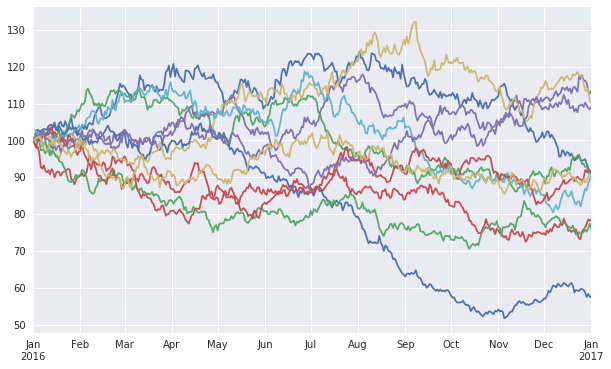

In [5]:
%matplotlib inline
paths_gbm_cas_1.loc[:, :10].plot(legend=False, figsize=(10, 6))

Next we define a new market enviroment which inherits from the previous one but has an additional Europen call option.

In [6]:
strike = 95.
cas_1_opt = dx.market_environment('cas_1_opt', cas_1.pricing_date)
cas_1_opt.add_environment(cas_1)
cas_1_opt.add_constant('maturity', dt.datetime(2017, 1, 1))
cas_1_opt.add_constant('strike', strike)

In [7]:
eur_call = dx.valuation_mcs_european_single(
            name='eur_call',
            underlying=gbm_cas_1,
            mar_env=cas_1_opt,
            payoff_func='np.maximum(maturity_value - strike, 0)')

The present value of the European call is uniquely given by no arbitrage arguments.

In [8]:
eur_call.present_value()

10.479573

The delta is the sensitivity with respect to the initial value.

In [9]:
eur_call.delta()

0.6415

The gamma is the sensitivity of the delta with respect to the initial value.

In [10]:
eur_call.gamma()

0.0176

The vega is the sensitivity with respect to volatility.

In [11]:
eur_call.vega()

37.1156

The theta is sensitivity with respect to maturity.

In [12]:
eur_call.theta()

-4.2138

The rho is sensitivity with respect to interest rate.

In [13]:
eur_call.rho()

53.6878

The previous quantities allow to understand the risks of the given derivative from the point of view of the chosen model in terms of sensitivities.

In the sequel we demonstrate the precise meaning of the option's delta by means of a running hedging portfolio.

In [14]:
path = gbm_cas_1.get_instrument_values()[:,0]
timegrid = gbm_cas_1.time_grid
presentvalue = eur_call.present_value()
n = len(path)
pnl = [presentvalue]
optionvalue = [np.maximum(0,path[0]-eur_call.strike)]

In [15]:
for i in range(n-1):
    r = dx.constant_short_rate('r', 0.)
    # a constant short rate

    running = dx.market_environment('running', timegrid[i])
    
    running.add_constant('initial_value', path[i])
    # starting value of simulated processes
    running.add_constant('volatility', 0.2)
    # volatiltiy factor
    running.add_constant('final_date', dt.datetime(2017, 1, 1))
    # horizon for simulation
    running.add_constant('currency', 'EUR')
    # currency of instrument
    running.add_constant('frequency', 'W')
    # frequency for discretization
    running.add_constant('paths', 10000)
    # number of paths
    running.add_curve('discount_curve', r)
    # number of paths
    gbm_running = dx.geometric_brownian_motion('gbm_running', running)
    opt_running = dx.market_environment('opt_running', running.pricing_date)
    opt_running.add_environment(running)
    opt_running.add_constant('maturity', dt.datetime(2017, 1, 1))
    opt_running.add_constant('strike', strike)
    eur_call = dx.valuation_mcs_european_single(
            name='eur_call',
            underlying=gbm_running,
            mar_env=opt_running,
            payoff_func='np.maximum(maturity_value - strike, 0)')
    #print(path[i])
    #print(timegrid[i])
    #print(eur_call.delta())
    pnl = pnl + [pnl[-1]+eur_call.delta()*(path[i+1]-path[i])]
    optionvalue = optionvalue + [np.maximum(0,path[i+1]-eur_call.strike)]

In [16]:
data = []
for j in range(n):
    data = data + [[optionvalue[j],pnl[j]]]

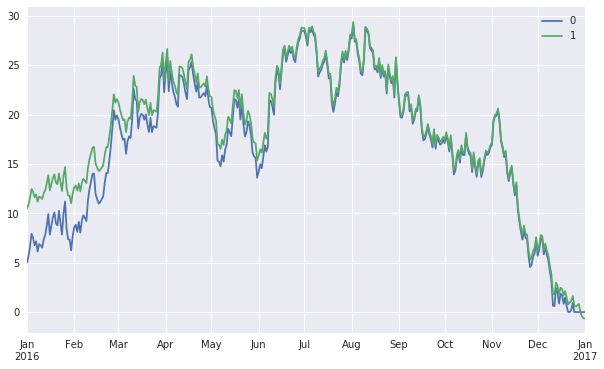

In [17]:
paths_hedge = pd.DataFrame(data, index=gbm_cas_1.time_grid)
%matplotlib inline
paths_hedge.loc[:,:].plot(legend=True, figsize=(10, 6))


# Interest rate terminology

Prices of zero-coupon bonds (ZCB) with maturity $ T $ are denoted by $P(t,T)$. Interest rates are governed by a market of (default free) zero-coupon bonds modeled by stochastic processes 
$ {(P(t,T))}_{0 \leq t \leq T} $ for $ T \geq 0 $. We assume the normalization $ P(T,T)=1 $.

$T$ denotes the maturity of the bond, $P(t,T)$ its price at a time $t$ before maturity $T$.

The yield
$$
Y(t,T) = - \frac{1}{T-t} \log P(t,T)
$$
describes the compound interest rate p.a. for maturity $T$.

The curve $f$ is called the forward rate curve of the bond market
\begin{align*}
P(t,T)  &  =\exp(-\int_{t}^{T}f(t,s)ds)
\end{align*}
for $0\leq t\leq T$.

Let us understand a bit the dynamics of yield curves and forward rate curves at this point:

In [147]:
from mpl_toolkits.mplot3d import Axes3D
import copy as copylib
from progressbar import *
%pylab
%matplotlib inline
import pandas as pandas
pylab.rcParams['figure.figsize'] = (16, 4.5)
numpy.random.seed(0);

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


/scratch/users/jteichma/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['product']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


First we load some historical data:

In [148]:
dataframe = pandas.read_csv('hjm_data.csv')

In [152]:
dataframe = dataframe/ 100 # Convert interest rates
pandas.options.display.max_rows = 10
display(dataframe)

0.08333333       0.5         1       1.5         2       2.5         3  \
0       0.000577  0.000644  0.000671  0.000665  0.000650  0.000633  0.000615   
1       0.000577  0.000645  0.000675  0.000668  0.000654  0.000639  0.000623   
2       0.000578  0.000644  0.000674  0.000668  0.000656  0.000641  0.000626   
3       0.000574  0.000641  0.000669  0.000662  0.000649  0.000635  0.000620   
4       0.000574  0.000640  0.000664  0.000655  0.000642  0.000627  0.000613   
...          ...       ...       ...       ...       ...       ...       ...   
1259    0.000464  0.000451  0.000425  0.000421  0.000427  0.000432  0.000436   
1260    0.000462  0.000450  0.000425  0.000421  0.000427  0.000433  0.000437   
1261    0.000463  0.000453  0.000433  0.000433  0.000440  0.000446  0.000450   
1262    0.000463  0.000453  0.000432  0.000431  0.000439  0.000445  0.000449   
1263    0.000461  0.000453  0.000429  0.000428  0.000435  0.000441  0.000444   

           3.5         4       4.5    ...         20.5        21      21.5  \
0     0.000599  0.000584  0.000571    ...     0.000342  0.000348  0.000354   
1     0.000608  0.000595  0.000582    ...     0.000338  0.000344  0.000351   
2     0.000612  0.000598  0.000584    ...     0.000327  0.000333  0.000339   
3     0.000606  0.000593  0.000579    ...     0.000313  0.000319  0.000325   
4     0.000598  0.000585  0.000572    ...     0.000301  0.000307  0.000312   
...        ...       ...       ...    ...          ...       ...       ...   
1259  0.000439  0.000442  0.000443    ...     0.000403  0.000401  0.000399   
1260  0.000440  0.000442  0.000444    ...     0.000403  0.000401  0.000400   
1261  0.000453  0.000456  0.000457    ...     0.000413  0.000411  0.000410   
1262  0.000453  0.000455  0.000457    ...     0.000411  0.000410  0.000408   
1263  0.000447  0.000449  0.000451    ...     0.000407  0.000405  0.000404   

            22      22.5        23      23.5        24      24.5        25  
0     0.000360  0.000366  0.000373  0.000379  0.000386  0.000392  0.000399  
1     0.000358  0.000365  0.000372  0.000380  0.000387  0.000395  0.000402  
2     0.000345  0.000352  0.000359  0.000365  0.000372  0.000379  0.000386  
3     0.000331  0.000337  0.000344  0.000351  0.000358  0.000365  0.000372  
4     0.000319  0.000325  0.000332  0.000338  0.000345  0.000353  0.000360  
...        ...       ...       ...       ...       ...       ...       ...  
1259  0.000398  0.000397  0.000396  0.000395  0.000394  0.000393  0.000392  
1260  0.000399  0.000397  0.000396  0.000395  0.000394  0.000393  0.000392  
1261  0.000408  0.000407  0.000406  0.000405  0.000404  0.000403  0.000402  
1262  0.000407  0.000406  0.000405  0.000404  0.000403  0.000402  0.000402  
1263  0.000402  0.000401  0.000400  0.000399  0.000398  0.000397  0.000396  

[1264 rows x 51 columns]

In [153]:
hist_timeline = list(dataframe.index)
tenors = [float(x) for x in dataframe.columns]
hist_rates=matrix(dataframe)

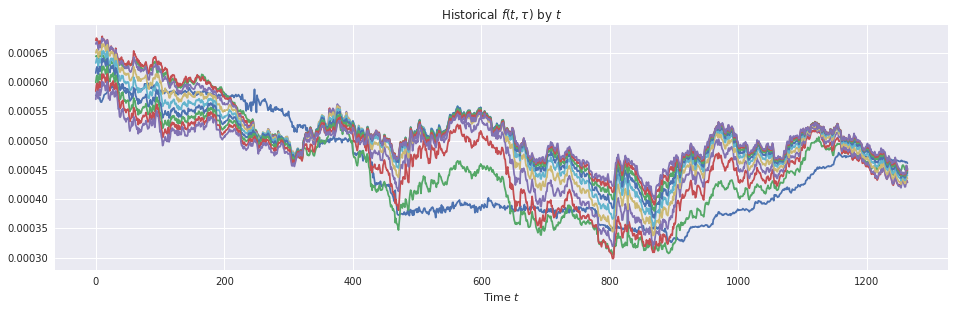

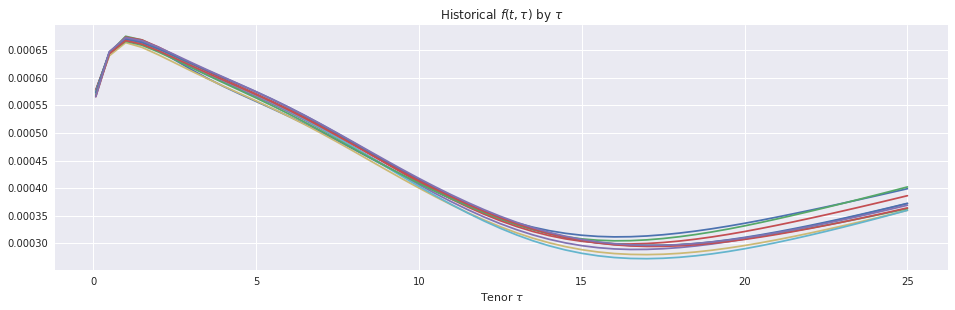

In [158]:
plot(hist_rates[:,0:10]), xlabel(r'Time $t$'), title(r'Historical $f(t,\tau)$ by $t$'), show()
plot(tenors, hist_rates.transpose()[:,0:10]), xlabel(r'Tenor $\tau$'), title(r'Historical $f(t,\tau)$ by $\tau$');

In a next step we look at returns for a certain maturity:

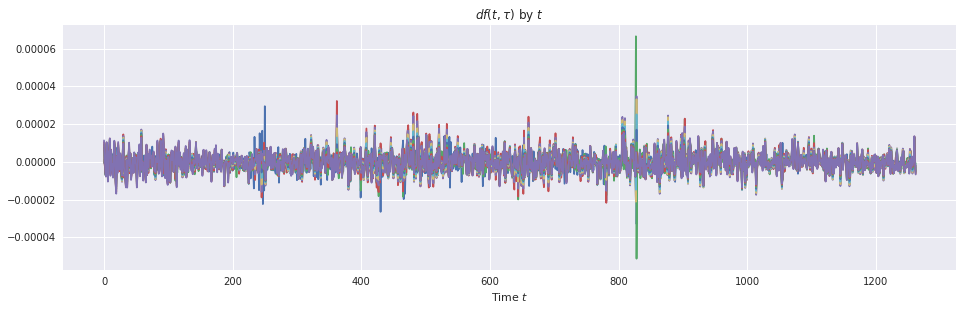

In [159]:
diff_rates = diff(hist_rates, axis=0)
assert(hist_rates.shape[1]==diff_rates.shape[1])
plot(diff_rates[:,0:10]), xlabel(r'Time $t$'), title(r'$df(t,\tau)$ by $t$');

This demonstrates impressively the complexity and beauty of interest rate behaviour.

### We are now applying our principles from the first general part to this large market. We use extensively that we can choose the asset $S^0$ for our convenience. In different market situations we can have different ways of discounting. We shall see two: discounting by the bank account process and discounting by a (forward) bond $ P(t,T^*) $. 

The short rate process is given through $R_{t}=f(t,t)$ for $t\geq0$ defining the "bank acco
unt process"
$$
(B(t))_{t \geq 0}:=(\exp(\int_{0}^{t}R_{s}ds))_{t \geq 0}.
$$

Consider now $ P(t,T) $ as price of a contract which promises $ 1 $ at time $ T $ and do the discounting with $ S^0 $ equal the bank account process.

No arbitrage is then guaranteed if on the filtered probability space $ (\Omega,\mathcal{F},Q) $ with filtration
$ {(\mathcal{F}_t)}_{t \geq 0} $,
$$
E(\exp(-\int_t^T R_s ds)|\mathcal{F}_t) = P(t,T)
$$
holds true for $ 0 \leq t \leq T $ for some equivalent (martingale) measure $ Q $.

This is a useful and important approach but not feasible for many market situations. There it is better to take another discounting unit.

Consider a bond market $(P(t,T))_{t \leq T}$ with $P(T,T) = 1$ and $P(t,T) > 0$. Let $t \leq T \leq  T^{\ast}$. We define the simple forward rate through
\begin{align*}
F(t;T,T^{\ast}) := \frac{1}{T^{\ast} - T} \bigg( \frac{P(t,T)}{P(t,T^{\ast})} - 1 \bigg).
\end{align*}
and the simple spot rate through
\begin{align*}
F(t,T) := F(t;t,T).
\end{align*}

Apparently $P(t,T^{\ast}) F(t;T,T^{\ast})$ is first a traded portfolio (long in the $T$ bond and short in the $T^*$ bond) and the fair value at time $t$ of a contract paying $F(T,T^{\ast})$ at time $T^{\ast}$, since $ P(T^*,T^*) = 1 $.

Indeed, note that
\begin{align*}
P(t,T^{\ast}) F(t;T,T^{\ast}) &= \frac{P(t,T) - P(t,T^{\ast})}{T^{\ast} - T},
\\ F(T,T^{\ast}) &= \frac{1}{T^{\ast} - T} \bigg( \frac{1}{P(T,T^{\ast})} - 1 \bigg).
\end{align*}
Fair value means that we can build a portfolio at time $ t $ and at price $ \frac{P(t,T) - P(t,T^{\ast})}{T^{\ast} - T} $ yielding $ F(T,T^{\ast}) $ at time $ T^{\ast} $:

-> Holding a ZCB with maturity $ T $ at time $ t $ has value $ P(t,T) $, being additionally short in a ZCB with maturity $ T^{\ast} $ amounts all together to $P(t,T) - P(t,T^{\ast})$.

-> at time $T$ we have to rebalance the portfolio by buying with the maturing ZCB another bond with maturity $ T^{\ast} $, precisely an amount $ 1/P(T,T^{\ast}) $. 

-> at time $ T^{\ast} $ we receive $  1/P(T,T^{\ast}) - 1 $.

In this setup it is of course much better to take $ S^0 $ the $ T^*$ bond and to have $ X_t = F(t,T,T^*) $ as discounted price with respect to $ S^0 $. We can use all models for discounted prices like the binomial model or the Black-Scholes model for this situation.

In the sequel we apply the binomial tree model with one timestep with a simple forward rate process and the foward bond starting at $0.9$ and terminating at $1$. Here discounting matters what you can see in the difference between the first (format time / numeraire / foward rate time $T^*$ bond) and second tree (format time / simple forward rate).

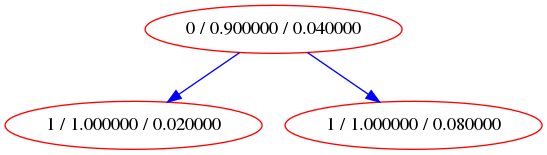

In [129]:
import numpy as np
from itertools import product


# EUROPEAN
F0 = 0.04
u  = 2
d  = 0.5
payoffE = lambda F: np.maximum(F-F0,0.)

timesteps = 1
bin = set((0,1))
trajectories = set(product(bin, repeat = timesteps))


import pygraphviz as PG
from IPython.display import Image
binomialtreeforward = PG.AGraph(directed=True, strict=True)
binomialtreeforward.edge_attr.update(len='2.0',color='blue')
binomialtreeforward.node_attr.update(color='red')
binomialtreeforwarddiscounted = PG.AGraph(directed=True, strict=True)
binomialtreeforwarddiscounted.edge_attr.update(len='2.0',color='blue')
binomialtreeforwarddiscounted.node_attr.update(color='red')
binomialtreebackward = PG.AGraph(directed=True, strict=True)
binomialtreebackward.edge_attr.update(len='2.0',color='blue')
binomialtreebackward.node_attr.update(color='red')
process = {(omega,0):F0 for omega in trajectories}
numeraire = {(omega,0):0.9 for omega in trajectories}
discountedprocess = {(omega,0):F0 for omega in trajectories}

#construct process by forward steps
for time in range(1,timesteps+1):
    for omega in trajectories:
        shelper = process[(omega,time-1)]*u**(omega[time-1])*d**(1.-omega[time-1])
        process.update({(omega,time):shelper})
        
for time in range(1,timesteps+1):
    for omega in trajectories:
        #shelper = process[(omega,time-1)]*u**(omega[time-1])*d**(1.-omega[time-1])
        numeraire.update({(omega,time):1.0})
        
for time in range(1,timesteps+1):
    for omega in trajectories:
        binomialtreeforward.add_edge('%d / %f / %f'% (time-1,numeraire[(omega,time-1)],process[(omega,time-1)]),
                                     '%d / %f / %f'% (time,numeraire[(omega,time)],process[(omega,time)]))

#for time in range(1,timesteps+1):
#    for omega in trajectories:
#        binomialtreeforward.add_edge('%d, %d'% (time-1,numeraire[(omega,time-1)]),'%d, %d'% (time,numeraire[(omega,time)]))

Image(binomialtreeforward.draw(format='png',prog='dot')) 

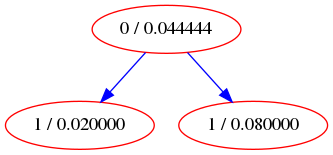

In [130]:
for time in range(0,timesteps+1):
    for omega in trajectories:
        shelper = process[(omega,time)]/numeraire[(omega,time)]
        discountedprocess.update({(omega,time):shelper})
        
for time in range(1,timesteps+1):
    for omega in trajectories:
        binomialtreeforwarddiscounted.add_edge('%d / %f'% (time-1,discountedprocess[(omega,time-1)]),'%d / %f'% (time,discountedprocess[(omega,time)]))

#for time in range(1,timesteps+1):
#    for omega in trajectories:
#        binomialtreeforward.add_edge('%d, %d'% (time-1,numeraire[(omega,time-1)]),'%d, %d'% (time,numeraire[(omega,time)]))


Image(binomialtreeforwarddiscounted.draw(format='png',prog='dot')) 

In [127]:
def condprob(omega,time): 
    omegahelperu = list(omega)
    omegahelperd = list(omega)
    omegahelperu[time]=1
    omegahelperd[time]=0
    omegahelperu = tuple(omegahelperu)
    omegahelperd = tuple(omegahelperd)
    return (discountedprocess[(omega,time)]-discountedprocess[(omegahelperd,time+1)])/(discountedprocess[(omegahelperu,time+1)]-discountedprocess[(omegahelperd,time+1)])

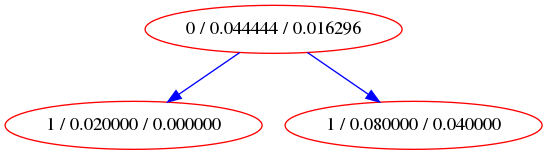

In [131]:
processbackward = {(omega,timesteps):(payoffE(process[(omega,timesteps)])/numeraire[(omega,timesteps)]) for omega in trajectories}
#backwardssteps: European
for time in reversed(range(0,timesteps)):
    for omega in trajectories:
        shelper=0                                   
        omegahelperu = list(omega)
        omegahelperd = list(omega)
        omegahelperu[time]=1
        omegahelperd[time]=0
        omegahelperu = tuple(omegahelperu)
        omegahelperd = tuple(omegahelperd)
        shelper = processbackward[(omegahelperu,time+1)]*condprob(omega,time)+processbackward[(omegahelperd,time+1)]*(1-condprob(omega,time))
        processbackward.update({(omega,time):shelper})

for time in range(1,timesteps+1):
    for omega in trajectories:
        binomialtreebackward.add_edge('%d / %f / %f'% (time-1,discountedprocess[(omega,time-1)],processbackward[(omega,time-1)]),'%d / %f / %f'% (time,discountedprocess[(omega,time)],processbackward[(omega,time)]))

Image(binomialtreebackward.draw(format='png',prog='dot'))       

In order to get prices back one has to multiply this tree with the corresponding numeraire prices, hence the actual caplet price will be $ 0.016296 * 0.9 $.

As an example we introduce a particular short rate model, the so called Cox Ingersoll Ross model or squared diffusion model. We define a second market environment and calculate zero coupon bond prices with respect to this model:

In [132]:
cas_2 = dx.market_environment(name='cas_2', pricing_date=dt.datetime(2015, 1, 1))
cas_2.add_constant('initial_value', 0.04)
cas_2.add_constant('volatility', 0.2)
cas_2.add_constant('kappa', 1.0)
cas_2.add_constant('theta', 0.05)
cas_2.add_constant('paths', 10000)
cas_2.add_constant('frequency', 'W')
cas_2.add_constant('starting_date', cas_2.pricing_date)
cas_2.add_constant('final_date', dt.datetime(2015, 12, 31))

We next define our model:

In [133]:
ssr = dx.stochastic_short_rate('sr', cas_2)

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

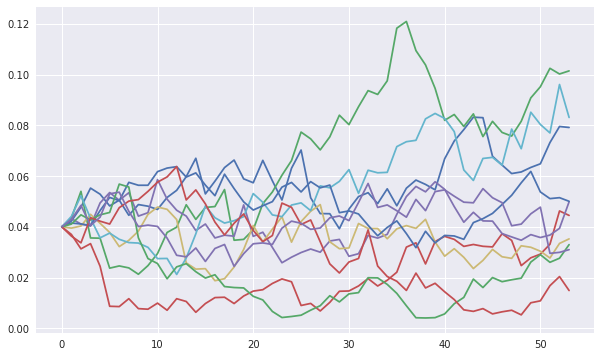

In [135]:
# short rate paths
plt.figure(figsize=(10, 6))
plt.plot(ssr.process.get_instrument_values()[:, :10]);

This shows some typical short rate paths in this model. We can also calculate the behaviour of ten typical paths for bond prices in a year. The price far right is of course the bond with one year maturity whose value in a year is $1$. The price far left is the price of one year ahead bond in one year.

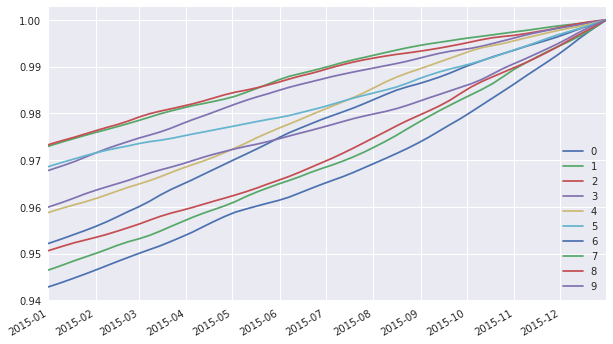

In [136]:
time_list = ssr.process.time_grid
forward_rates=ssr.get_forward_rates(time_list, 10)
ZCB = ssr.get_discount_factors(time_list, 10)
ZCB = pd.DataFrame(ZCB[1], index=time_list)
%matplotlib inline
ZCB.loc[:,:].plot(legend=True, figsize=(10, 6));

## Caps

In the sequel, we fix a number of future dates 
\begin{align*}
T_0 < T_1 < \ldots < T_n 
\end{align*}
with $T_i - T_{i-1} \equiv \delta$.

Fix a rate $\kappa > 0$. At time $T_i$ the holder of the cap receives
\begin{align*}
\delta (F(T_{i-1},T_i) - \kappa)^+.
\end{align*}
Let $t \leq T_0$. We write
\begin{align*}
{\rm Cpl}(t;T_{i-1},T_i), \quad i=1,\ldots,n
\end{align*}
for the time $t$ price of the $i$th caplet, and
\begin{align*}
{\rm Cp}(t) = \sum_{i=1}^n {\rm Cpl}(t;T_{i-1},T_i)
\end{align*}
for the time $t$ price of the cap.

## Floors 

At time $T_i$ the holder of the floor receives
\begin{align*}
\delta (\kappa - F(T_{i-1},T_i))^+.
\end{align*}
Let $t \leq T_0$. We write
\begin{align*}
{\rm Fll}(t;T_{i-1},T_i), \quad i=1,\ldots,n
\end{align*}
for the time $t$ price of the $i$th floorlet, and
\begin{align*}
{\rm Fl}(t) = \sum_{i=1}^n {\rm Fll}(t;T_{i-1},T_i)
\end{align*}
for the time $t$ price of the floor.

## Swaps

Fix a rate $K$ and a nominal $N$. The cash flow of a payer swap at $T_i$ is
\begin{align*}
(F(T_{i-1},T_i) - K) \delta N.
\end{align*}
The total value $\Pi_p(t)$ of the payer swap at time $t \leq T_0$ is
\begin{align*}
\Pi_p(t) = N \bigg( P(t,T_0) - P(t,T_n) - K \delta \sum_{i=1}^n P(t,T_i) \bigg).
\end{align*}
The value of a receiver swap at $t \leq T_0$ is
\begin{align*}
\Pi_r(t) = -\Pi_p(t).
\end{align*}
The swap rate $R_{\rm swap}(t)$ is the fixed rate $K$ which gives $\Pi_p(t) = \Pi_r(t) = 0$. Hence
\begin{align*}
R_{\rm swap}(t) = \frac{P(t,T_0) - P(t,T_n)}{\delta \sum_{i=1}^n P(t,T_i)}, \quad t \in [0,T_0].
\end{align*}

## Swaptions

A payer (receiver) swaption is an option to enter a payer (receiver) swap at $T_0$.
The payoff of a payer swaption at $T_0$ is
\begin{align*}
N \delta (R_{\rm swap}(T_0) - K)^+ \sum_{i=1}^n P(T_0,T_i),
\end{align*}
and of a receiver swaption
\begin{align*}
N \delta (K - R_{\rm swap}(T_0))^+ \sum_{i=1}^n P(T_0,T_i).
\end{align*}

## Spot measure

From now on, let $P$ be a martingale measure in the bond market $(P(t,T))_{t \leq T}$, i.e. for each $T > 0$ the discounted bond price process
\begin{align*}
\frac{P(t,T)}{B(t)}
\end{align*}
is a martingale. This leads to the following fundamental formula of interest rate theory
$$
P(t,T) = E(\exp(-\int_t^T R_s ds)) | \mathcal{F}_t )
$$
for $ 0 \leq t \leq T $.

## Forward measures

For $T^{\ast} > 0$ define the \emph{$T^{\ast}$-forward measure} ${P}^{T^{\ast}} $ such that for any $T > 0$ the discounted bond price process
\begin{align*}
\frac{P(t,T)}{P(t,T^{\ast})}, \quad t \in [0,T]
\end{align*}
is a ${P}^{T^{\ast}}$-martingale.


For any $T < T^{\ast}$ the simple forward rate
\begin{align*}
F(t;T,T^{\ast}) = \frac{1}{T^{\ast} - T} \bigg( \frac{P(t,T)}{P(t,T^{\ast})} - 1 \bigg)
\end{align*}
is a $\mathbb{P}^{T^{\ast}}$-martingale.

For any time derivative $X \in \mathcal{F}_{T^*}$ paid at $ T^* $ we have that the fair value via ``martingale pricing'' is given through
\begin{align*}
P(t,T^*) \mathbb{E}^{T^*}[X | \mathcal{F}_t].
\end{align*}
The fair price of the $i$th caplet is therefore given by
\begin{align*}
{\rm Cpl}(t;T_{i-1},T_i) = \delta P(t,T_i) \mathbb{E}^{T_i} [ (F(T_{i-1},T_i) - \kappa)^+ | \mathcal{F}_t].
\end{align*}
By the martingale property we obtain therefore
\begin{align*}
\mathbb{E}^{T_i}[F(T_{i-1},T_i)  | \mathcal{F}_t] = F(t;T_{i-1},T_i),
\end{align*}
what was proved by trading arguments before.

## Black's formula

Let $X \sim N(\mu,\sigma^2)$ and $K \in \mathbb{R}_{> 0}$. Then we have
\begin{align*}
\mathbb{E}[ (e^X - K)^+ ] &= e^{\mu + \frac{\sigma^2}{2}} \Phi \bigg( -\frac{\log K - (\mu + \sigma^2)}{\sigma} \bigg)
- K \Phi \bigg( -\frac{\log K - \mu}{\sigma} \bigg),
\\ \mathbb{E}[ (K - e^X)^+ ] &=  K \Phi \bigg( \frac{\log K - \mu}{\sigma} \bigg) - e^{\mu + \frac{\sigma^2}{2}} \Phi \bigg( \frac{\log K - (\mu + \sigma^2)}{\sigma} \bigg).
\end{align*}

## Black's formula for caps and floors


Let $t \leq T_0$. From our previous results we know that 
\begin{align*}
{\rm Cpl}(t;T_{i-1},T_i) &= \delta P(t,T_i) \mathbb{E}_t^{{T_i}} [ (F(T_{i-1},T_i) - \kappa)^+ ],
\\ {\rm Fll}(t;T_{i-1},T_i) &= \delta P(t,T_i) \mathbb{E}_t^{{T_i}} [ (\kappa - F(T_{i-1},T_i))^+ ],
\end{align*}
and that $F(t;T_{i-1},T_i)$ is an $P^{T_i}$-martingale.

We assume that under ${P}^{T_i}$ the forward rate  $F(t;T_{i-1},T_i)$ is an exponential Brownian motion
\begin{align*}
F(t;T_{i-1},T_i) & = F(s;T_{i-1},T_i) \\
&  \exp \bigg( -\frac{1}{2} \int_s^t \lambda(u,T_{i-1})^2 du + \int_s^t \lambda(u,T_{i-1}) dW_u^{T_i} \bigg)
\end{align*}
for $s \leq t \leq T_{i-1}$,
with a function $\lambda(u,T_{i-1})$. 

We define the variance $\sigma^2(t)$ as
\begin{align*}
\sigma^2(t) := \frac{1}{T_{i-1} - t} \int_t^{T_{i-1}} \lambda(s,T_{i-1})^2 ds.
\end{align*}
The $P^{T_i}$-distribution of $\log F(T_{i-1},T_i)$ conditional on $\mathcal{F}_t$ is
$N(\mu,\sigma^2)$ with
\begin{align*}
\mu &= \log F(t;T_{i-1},T_i) - \frac{\sigma^2(t)}{2} (T_{i-1} - t),
\\ \sigma^2 &= \sigma^2(t) (T_{i-1} - t).
\end{align*}
In particular
\begin{align*}
\mu + \frac{\sigma^2}{2} &= \log  F(t;T_{i-1},T_i),
\\ \mu + \sigma^2 &= \log  F(t;T_{i-1},T_i) + \frac{\sigma^2(t)}{2} (T_{i-1} - t).
\end{align*}

We have
\begin{align*}
{\rm Cpl}(t;T_{i-1},T_i) &= \delta P(t,T_i) (F(t;T_{i-1},T_i) \Phi(d_1(i;t)) - \kappa \Phi(d_2(i;t))),
\\ {\rm Fll}(t;T_{i-1},T_i) &= \delta P(t,T_i) ( \kappa \Phi(-d_2(i;t)) - F(t;T_{i-1},T_i) \Phi(-d_1(i;t)) ),
\end{align*}
where
\begin{align*}
d_{1,2}(i;t) = \frac{\log \big( \frac{F(t;T_{i-1},T_i)}{\kappa} \big) \pm \frac{1}{2} \sigma(t)^2 (T_{i-1} - t)}{\sigma(t) \sqrt{T_{i-1} - t}}.
\end{align*}

We shall now use Quantlib library to valuate a cap in a constant and non-constant volatility market environment. We use here code kindly provided at http://gouthamanbalaraman.com/blog/interest-rate-cap-floor-valuation-quantlib-python.html. First we have to specify the market environment, then we specify the cap as a sum of caplets.

In [138]:
import QuantLib as ql

calc_date = ql.Date(14, 6, 2016)
ql.Settings.instance().evaluationDate = calc_date

dates = [ql.Date(14,6,2016), ql.Date(14,9,2016), 
         ql.Date(14,12,2016), ql.Date(14,6,2017),
         ql.Date(14,6,2019), ql.Date(14,6,2021),
         ql.Date(15,6,2026), ql.Date(16,6,2031),
         ql.Date(16,6,2036), ql.Date(14,6,2046)
         ]
yields = [0.000000, 0.006616, 0.007049, 0.007795,
          0.009599, 0.011203, 0.015068, 0.017583,
          0.018998, 0.020080]
day_count = ql.ActualActual()
calendar = ql.UnitedStates()
interpolation = ql.Linear()
compounding = ql.Compounded
compounding_frequency = ql.Annual

term_structure = ql.ZeroCurve(dates, yields, day_count, calendar, 
                       interpolation, compounding, compounding_frequency)
ts_handle = ql.YieldTermStructureHandle(term_structure)

In [139]:
start_date = ql.Date(14, 6, 2016)
end_date = ql.Date(14, 6 , 2026)
period = ql.Period(3, ql.Months)
calendar = ql.UnitedStates()
buss_convention = ql.ModifiedFollowing
rule = ql.DateGeneration.Forward
end_of_month = False

schedule = ql.Schedule(start_date, end_date, period,
                       calendar, buss_convention, buss_convention, 
                       rule, end_of_month)

In [140]:
ibor_index = ql.USDLibor(ql.Period(3, ql.Months), ts_handle)
ibor_index.addFixing(ql.Date(10,6,2016), 0.0065560)

ibor_leg = ql.IborLeg([1000000], schedule, ibor_index)

Now all required pieces are set and we can evaluate the cap:

In [141]:
strike = 0.02
cap = ql.Cap(ibor_leg, [strike])

vols = ql.QuoteHandle(ql.SimpleQuote(0.547295))
engine = ql.BlackCapFloorEngine(ts_handle, vols)

cap.setPricingEngine(engine)
print(cap.NPV())


54369.85806286924


Reality, however, is more complicated, and whence volatility not constant.

In [142]:
strikes = [0.01,0.015, 0.02]
expiries = [ql.Period(i, ql.Years) for i in range(1,11)] + [ql.Period(12, ql.Years)]
vols = ql.Matrix(len(expiries), len(strikes))
data = [[47.27, 55.47, 64.07, 70.14, 72.13, 69.41, 72.15, 67.28, 66.08, 68.64, 65.83],
   [46.65,54.15,61.47,65.53,66.28,62.83,64.42,60.05,58.71,60.35,55.91],
   [46.6,52.65,59.32,62.05,62.0,58.09,59.03,55.0,53.59,54.74,49.54]
   ]

for i in range(vols.rows()):
    for j in range(vols.columns()):
        vols[i][j] = data[j][i]/100.0

Cap-Floor volatilities are provided by the market, Quantlib strips volatilities out of it.

In [143]:
calendar = ql.UnitedStates()
bdc = ql.ModifiedFollowing
daycount = ql.Actual365Fixed()
settlement_days = 2
capfloor_vol = ql.CapFloorTermVolSurface(settlement_days, calendar, bdc, expiries, strikes, vols, daycount)


In [144]:
optionlet_surf = ql.OptionletStripper1(capfloor_vol, ibor_index)
ovs_handle = ql.OptionletVolatilityStructureHandle(
    ql.StrippedOptionletAdapter(optionlet_surf)
)

The procedure is visualized below:

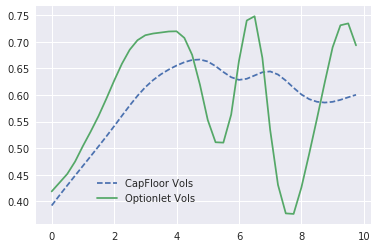

In [145]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

tenors = np.arange(0,10,0.25)
strike = 0.015
capfloor_vols = [capfloor_vol.volatility(t, strike) for t in tenors]
opionlet_vols = [ovs_handle.volatility(t, strike) for t in tenors]

plt.plot(tenors, capfloor_vols, "--", label="CapFloor Vols")
plt.plot(tenors, opionlet_vols,"-", label="Optionlet Vols")
plt.legend(bbox_to_anchor=(0.5, 0.25))



The resulting cap price is slightly different from before

In [146]:
engine2 = ql.BlackCapFloorEngine(ts_handle, ovs_handle)
cap.setPricingEngine(engine2)
print(cap.NPV())

54384.92831495013
